[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sadiq937/Shaik_DM/blob/main/ps1.ipynb).

## **PS-1** -*By Fnu Shaik Mohammed Sadiq*

Import Statements

In [94]:
pip install pyreadstat

In [95]:
import pandas as pd
import pyreadstat
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import re

Seaborn for visualization

In [96]:
sns.set(style="darkgrid")

Upload Multiple files

In [97]:
!wget -q -O accounts.html https://drive.google.com/uc?id=1x_aU7MXW9U_4qBX969iLKJDYyUioRl8S&export=download
!wget -q -O data_dictionary.parquet https://drive.google.com/uc?id=1ekfPeY7Nd2HZX6Yp-Aohk1V6qP3tOY_P&export=download
!wget -q -O products.csv https://drive.google.com/uc?id=1vHGF3UbolMJPiy4mxbt-NxXFn5xfWbBD&export=download
!wget -q -O sales_pipeline.csv https://drive.google.com/uc?id=1uQMOXC7ooh9G-OBD6GnoWGo6yg8pDUBV&export=download
!wget -q -O sales_teams.json https://drive.google.com/uc?id=1r0Xo89L6-YM1gJhXKaRFeDNnsvnbQJMJ&export=download


In [98]:
# #from google.colab import files
# import os

# # Upload multiple files
# uploaded = files.upload()

# # Keep original filenames
# for filename in uploaded.keys():
#     print(f"File {filename} uploaded successfully.")

# print("All files are saved in Colab storage.")


To verify the files uploaded

In [99]:
!ls -lh


total 672K
-rw-r--r-- 1 root root  16K Feb 11 20:21 accounts.html
-rw-r--r-- 1 root root 2.9K Feb 11 20:21 data_dictionary.parquet
-rw-r--r-- 1 root root 1.2K Feb 11 20:33 high_value_sales.csv
-rw-r--r-- 1 root root  171 Feb 11 20:47 products.csv
-rw-r--r-- 1 root root 2.4K Feb 11 20:45 products.xml
-rw-r--r-- 1 root root  268 Feb 11 20:33 revenue_by_sector.csv
-rw-r--r-- 1 root root  745 Feb 11 20:33 sales_by_agent.csv
-rw-r--r-- 1 root root 623K Feb 11 20:21 sales_pipeline.csv
-rw-r--r-- 1 root root 3.0K Feb 11 20:21 sales_teams.json
drwxr-xr-x 1 root root 4.0K Feb 10 14:25 sample_data


In [100]:
# Read the CSV file
sales_df = pd.read_csv("sales_pipeline.csv")
print("\nSales Pipeline Data (CSV):")
print(sales_df.head())


Sales Pipeline Data (CSV):
  opportunity_id      sales_agent         product  account deal_stage  \
0       1C1I7A6R      Moses Frase  GTX Plus Basic  Cancity        Won   
1       Z063OYW0  Darcel Schlecht          GTXPro    Isdom        Won   
2       EC4QE1BX  Darcel Schlecht      MG Special  Cancity        Won   
3       MV1LWRNH      Moses Frase       GTX Basic  Codehow        Won   
4       PE84CX4O        Zane Levy       GTX Basic   Hatfan        Won   

  engage_date  close_date  close_value  
0  2016-10-20  2017-03-01       1054.0  
1  2016-10-25  2017-03-11       4514.0  
2  2016-10-25  2017-03-07         50.0  
3  2016-10-25  2017-03-09        588.0  
4  2016-10-25  2017-03-02        517.0  


In [101]:
# Read the JSON file
sales_teams_df = pd.read_json("sales_teams.json", lines=True)
print("\nSales Teams Data (JSON):")
print(sales_teams_df.head())


Sales Teams Data (JSON):
         sales_agent           manager regional_office
0      Anna Snelling  Dustin Brinkmann         Central
1     Cecily Lampkin  Dustin Brinkmann         Central
2  Versie Hillebrand  Dustin Brinkmann         Central
3    Lajuana Vencill  Dustin Brinkmann         Central
4        Moses Frase  Dustin Brinkmann         Central


In [102]:
# Read the Parquet file
data_dict_df = pd.read_parquet("data_dictionary.parquet")
print("\nData Dictionary (Parquet):")
print(data_dict_df.head())


Data Dictionary (Parquet):
      Table             Field                          Description
0  accounts           account                         Company name
1  accounts            sector                             Industry
2  accounts  year_established                     Year Established
3  accounts           revenue  Annual revenue (in millions of USD)
4  accounts         employees                  Number of employees


In [103]:
# Read the  csv file
products_df = pd.read_csv("products.csv")
print("\nProducts Data (csv):")
print(products_df.head())


Products Data (csv):
        product series  sales_price
0     GTX Basic    GTX          550
1       GTX Pro    GTX         4821
2    MG Special     MG           55
3   MG Advanced     MG         3393
4  GTX Plus Pro    GTX         5482


In [104]:
# Read the HTML file
accounts_df = pd.read_html("accounts.html")[0]  # Extract first table from HTML
print("Accounts Data (HTML):")
print(accounts_df.head())

Accounts Data (HTML):
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical              1991   326.82       1016   

  office_location subsidiary_of  
0   United States           NaN  
1   United States           NaN  
2           Kenya           NaN  
3      Philipines           NaN  
4   United States           NaN  


In [105]:
# Function to display descriptive statistics
def display_stats(df, name):
    print(f"\nDescriptive Statistics for {name}:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

In [106]:
# Function to plot distributions
def plot_distributions(df, column, name):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f"Distribution of {column} in {name}")
    plt.show()



## **Descriptive Stats**


Descriptive Statistics for Accounts Data:
       year_established       revenue     employees
count         85.000000     85.000000     85.000000
mean        1996.105882   1994.632941   4660.823529
std            8.865427   2169.491436   5715.601198
min         1979.000000      4.540000      9.000000
25%         1989.000000    497.110000   1179.000000
50%         1996.000000   1223.720000   2769.000000
75%         2002.000000   2741.370000   5595.000000
max         2017.000000  11698.030000  34288.000000

Missing Values:
account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64


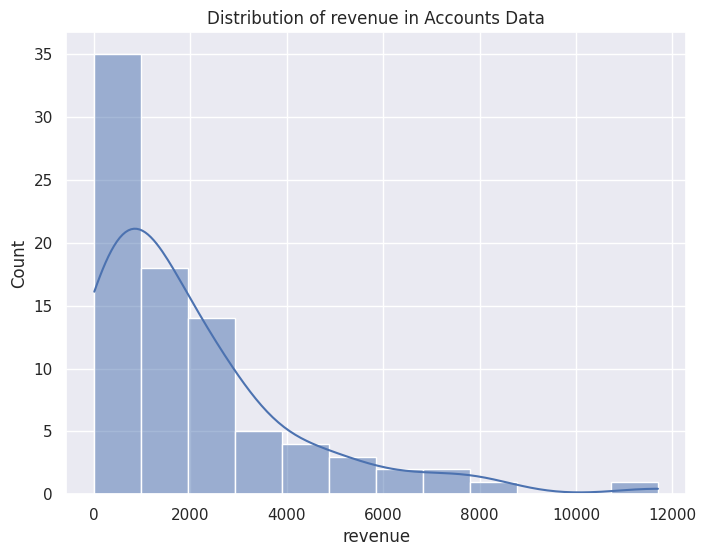

In [107]:
# Descriptive stats for accounts data
display_stats(accounts_df, "Accounts Data")
plot_distributions(accounts_df, 'revenue', "Accounts Data")


Descriptive Statistics for Sales Pipeline Data:
        close_value
count   6711.000000
mean    1490.915512
std     2320.670773
min        0.000000
25%        0.000000
50%      472.000000
75%     3225.000000
max    30288.000000

Missing Values:
opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64


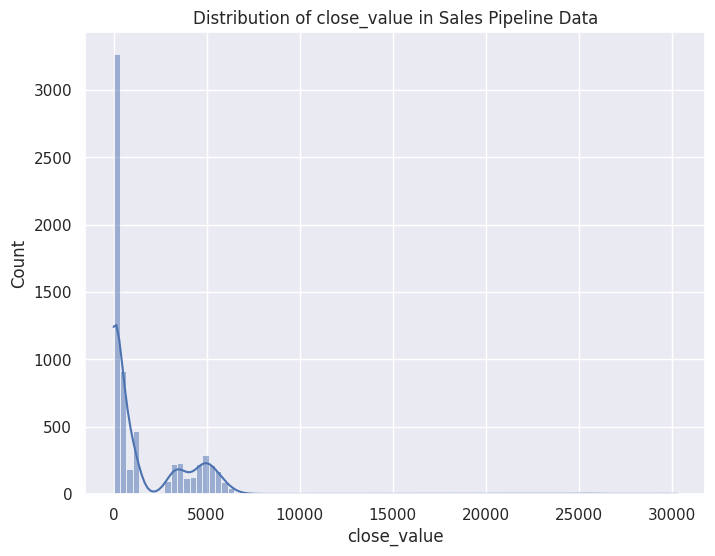

In [108]:
# Descriptive stats for sales pipeline data
display_stats(sales_df, "Sales Pipeline Data")
plot_distributions(sales_df, 'close_value', "Sales Pipeline Data")

In [109]:
# Descriptive stats for sales teams data
display_stats(sales_teams_df, "Sales Teams Data")


Descriptive Statistics for Sales Teams Data:
          sales_agent        manager regional_office
count              35             35              35
unique             35              6               3
top     Anna Snelling  Melvin Marxen            East
freq                1              6              12

Missing Values:
sales_agent        0
manager            0
regional_office    0
dtype: int64


## **Data Manipulation**

In [110]:
# Subset/Slice on condition: Filter sales with close_value > 10000
high_value_sales = sales_df[sales_df['close_value'] > 10000]
print("\nHigh-Value Sales (close_value > 10000):")
print(high_value_sales.head())

# Filter variables using regex: Select columns containing 'sales' in their names
sales_columns = sales_df.filter(regex='sales', axis=1)
print("\nColumns with 'sales' in their names:")
print(sales_columns.head())

# Groupby and aggregate: Total sales by sales_agent
sales_by_agent = sales_df.groupby('sales_agent')['close_value'].sum().reset_index()
print("\nTotal Sales by Sales Agent:")
print(sales_by_agent)

# Groupby and aggregate: Average revenue by sector in accounts data
revenue_by_sector = accounts_df.groupby('sector')['revenue'].mean().reset_index()
print("\nAverage Revenue by Sector:")
print(revenue_by_sector)


High-Value Sales (close_value > 10000):
     opportunity_id      sales_agent  product        account deal_stage  \
59         XUSUEAV7     Elease Gluck  GTK 500         Zoomit        Won   
677        60UOBOEM  Rosalina Dieter  GTK 500   Groovestreet        Won   
1156       4V0S4BA3   Markita Hansen  GTK 500     Goodsilron        Won   
1825       JXUXBANJ  Rosalina Dieter  GTK 500  Y-corporation        Won   
2559       OUIK8VX3     Elease Gluck  GTK 500     Lexiqvolax        Won   

     engage_date  close_date  close_value  
59    2016-11-20  2017-03-09      25897.0  
677   2017-02-01  2017-06-07      30288.0  
1156  2017-02-27  2017-06-27      29617.0  
1825  2017-03-26  2017-04-05      25288.0  
2559  2017-04-19  2017-04-20      23746.0  

Columns with 'sales' in their names:
       sales_agent
0      Moses Frase
1  Darcel Schlecht
2  Darcel Schlecht
3      Moses Frase
4        Zane Levy

Total Sales by Sales Agent:
           sales_agent  close_value
0        Anna Snelling     


Merged Sales and Sales Teams Data:
  opportunity_id      sales_agent         product  account deal_stage  \
0       1C1I7A6R      Moses Frase  GTX Plus Basic  Cancity        Won   
1       Z063OYW0  Darcel Schlecht          GTXPro    Isdom        Won   
2       EC4QE1BX  Darcel Schlecht      MG Special  Cancity        Won   
3       MV1LWRNH      Moses Frase       GTX Basic  Codehow        Won   
4       PE84CX4O        Zane Levy       GTX Basic   Hatfan        Won   

  engage_date  close_date  close_value           manager regional_office  
0  2016-10-20  2017-03-01       1054.0  Dustin Brinkmann         Central  
1  2016-10-25  2017-03-11       4514.0     Melvin Marxen         Central  
2  2016-10-25  2017-03-07         50.0     Melvin Marxen         Central  
3  2016-10-25  2017-03-09        588.0  Dustin Brinkmann         Central  
4  2016-10-25  2017-03-02        517.0     Summer Sewald            West  


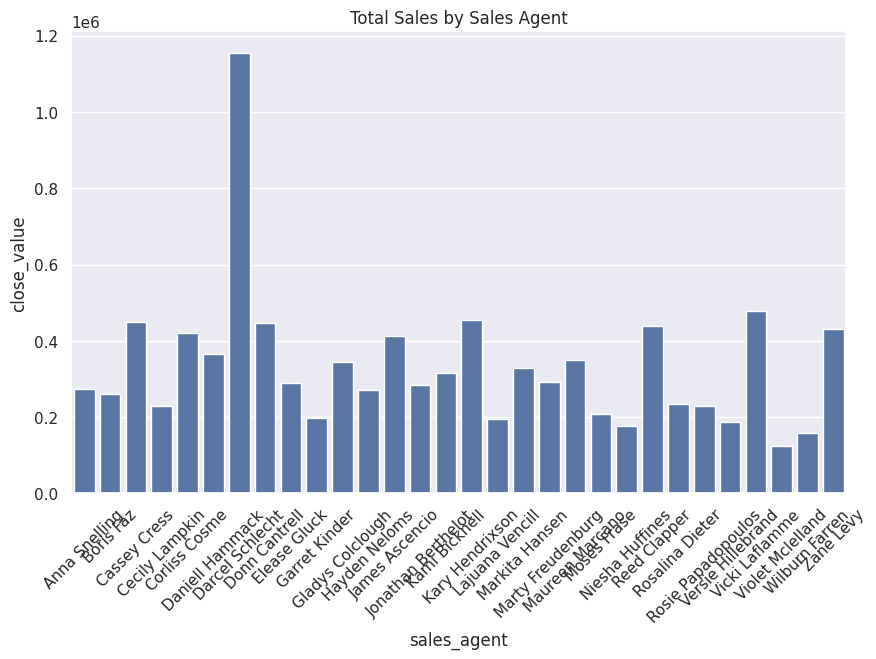

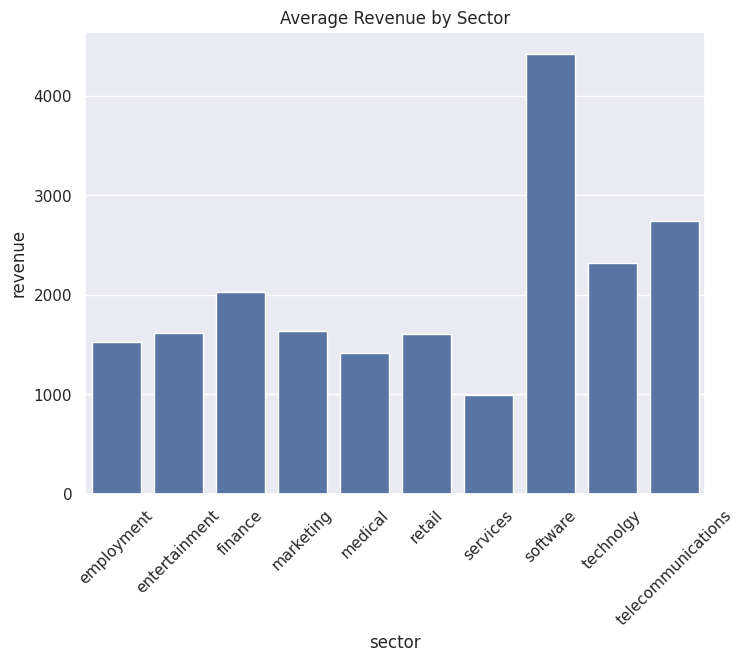


Exported high_value_sales.csv, sales_by_agent.csv, and revenue_by_sector.csv

Accounts Data after filling missing values:
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical              1991   326.82       1016   

  office_location subsidiary_of  
0   United States           NaN  
1   United States           NaN  
2           Kenya           NaN  
3      Philipines           NaN  
4   United States           NaN  


<ipython-input-111-588177924246>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accounts_df['revenue'].fillna(accounts_df['revenue'].median(), inplace=True)


In [111]:
# 4. Extra Features
# -----------------

# Merge datasets: Combine sales data with sales teams data
merged_df = pd.merge(sales_df, sales_teams_df, on='sales_agent', how='left')
print("\nMerged Sales and Sales Teams Data:")
print(merged_df.head())

# Visualize total sales by agent
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_agent', y='close_value', data=sales_by_agent)
plt.title("Total Sales by Sales Agent")
plt.xticks(rotation=45)
plt.show()

# Visualize average revenue by sector
plt.figure(figsize=(8, 6))
sns.barplot(x='sector', y='revenue', data=revenue_by_sector)
plt.title("Average Revenue by Sector")
plt.xticks(rotation=45)
plt.show()

# Export results to CSV
high_value_sales.to_csv('high_value_sales.csv', index=False)
sales_by_agent.to_csv('sales_by_agent.csv', index=False)
revenue_by_sector.to_csv('revenue_by_sector.csv', index=False)
print("\nExported high_value_sales.csv, sales_by_agent.csv, and revenue_by_sector.csv")

# Data Cleaning: Handle missing values in accounts data
accounts_df['revenue'].fillna(accounts_df['revenue'].median(), inplace=True)
print("\nAccounts Data after filling missing values:")
print(accounts_df.head())

In [112]:
# 5. Summary
# ----------
print("\nProject Summary:")
print("- Read datasets in HTML, Parquet, XML, CSV, and JSON formats.")
print("- Performed descriptive statistics and visualized distributions.")
print("- Manipulated data by subsetting, filtering, and aggregating.")
print("- Added extra features like merging datasets, visualizing results, and exporting data.")


Project Summary:
- Read datasets in HTML, Parquet, XML, CSV, and JSON formats.
- Performed descriptive statistics and visualized distributions.
- Manipulated data by subsetting, filtering, and aggregating.
- Added extra features like merging datasets, visualizing results, and exporting data.
